In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


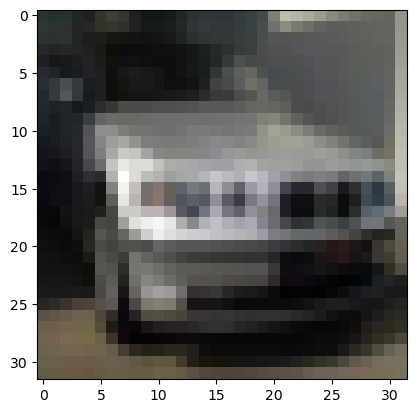

car  


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# Use multiple layers alongside convolution layers beforehand to transition from input to 110 neurons to 74 neurons to 10 neurons
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Lists to store metrics for plotting
loss_metric = []
training_accuracy = []
test_accuracy = []

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    # Statistics
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics and calculate accuracy
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Record the training accuracy and loss
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total
    loss_metric.append(epoch_loss)
    training_accuracy.append(epoch_accuracy)

    # Record the testing accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    test_accuracy.append(acc)

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 2.033
[1,  6000] loss: 1.919
[1,  8000] loss: 1.820
[1, 10000] loss: 1.797
[1, 12000] loss: 1.725
[1, 14000] loss: 1.705
[1, 16000] loss: 1.686
[1, 18000] loss: 1.636
[1, 20000] loss: 1.680
[1, 22000] loss: 1.713
[1, 24000] loss: 1.660
[1, 26000] loss: 1.616
[1, 28000] loss: 1.627
[1, 30000] loss: 1.598
[1, 32000] loss: 1.613
[1, 34000] loss: 1.550
[1, 36000] loss: 1.604
[1, 38000] loss: 1.590
[1, 40000] loss: 1.615
[1, 42000] loss: 1.556
[1, 44000] loss: 1.579
[1, 46000] loss: 1.564
[1, 48000] loss: 1.579
[1, 50000] loss: 1.546
[2,  2000] loss: 1.483
[2,  4000] loss: 1.520
[2,  6000] loss: 1.546
[2,  8000] loss: 1.496
[2, 10000] loss: 1.530
[2, 12000] loss: 1.475
[2, 14000] loss: 1.527
[2, 16000] loss: 1.489
[2, 18000] loss: 1.482
[2, 20000] loss: 1.534
[2, 22000] loss: 1.512
[2, 24000] loss: 1.508
[2, 26000] loss: 1.526
[2, 28000] loss: 1.500
[2, 30000] loss: 1.519
[2, 32000] loss: 1.517
[2, 34000] loss: 1.499
[2, 36000] loss: 1.532
[2, 38000] 

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

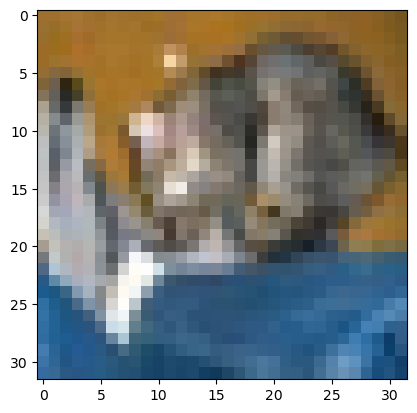

GroundTruth:  cat  


In [12]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(1)))

Predicted:  bird 


In [16]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


In [17]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 100.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %


In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


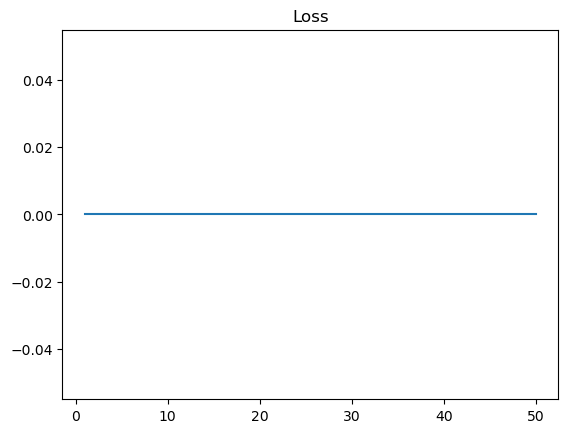

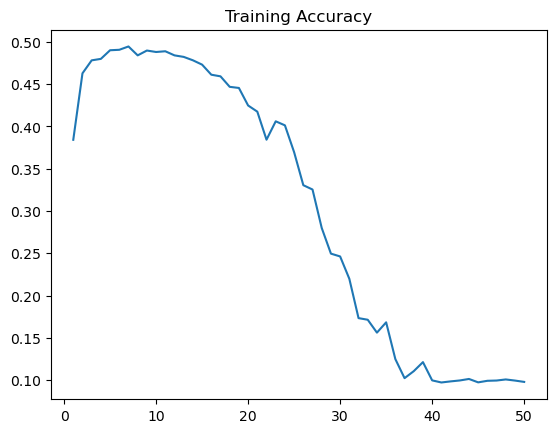

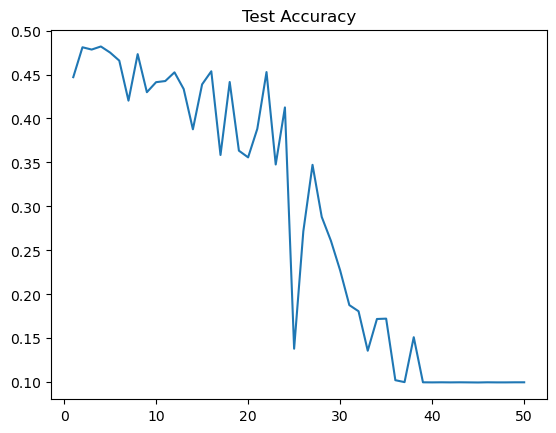

In [19]:
# Plotting the results
epochs = range(1, 51)

plt.plot(epochs, loss_metric)
plt.title('Loss')
plt.show()

plt.plot(epochs, training_accuracy)
plt.title('Training Accuracy')
plt.show()

plt.plot(epochs, test_accuracy)
plt.title('Test Accuracy')
plt.show()

It seems that if a batch size of 1 is used, the training is much less stable. The graph for loss is clearly inaccurate, and somehow training and test accuracies go down as more epochs occur, indicating severe deficiencies in the learning process.

In [20]:
del dataiter